# Domain Twist

In [3]:
from __future__ import print_function
%matplotlib inline
import mdtraj as md
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy
from scipy.spatial.distance import squareform
import pandas as pd
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
#XRD Ensemble
#28 4NPQ
#18 4HFI

In [129]:
def pdb_ensemble_domain_twist():
    wholetraj = md.load("/home/scottzhuang/masterthesis/miscellanies/pdb_ensemble/new_ensemble.pdb")
    superpose_pdb = md.load("/home/scottzhuang/masterthesis/miscellanies/pdb_ensemble/GLIC_princ_rotate.pdb")
    wholetraj.superpose(superpose_pdb,0)
    topology = wholetraj.topology
    domain_twist = []
    for chain in range (0,5):
        residue_selection_1 = "resid " + str(8+chain*311) + " to " + str(192+chain*311)
        residue_selection_2 = "resid " + str(192+chain*311) + " to " + str(310+chain*311)
        wholetraj_sliced_ecd = wholetraj.atom_slice(topology.select(residue_selection_1))
        wholetraj_sliced_tmd = wholetraj.atom_slice(topology.select(residue_selection_2))
        angle = []
        for i in range(0,wholetraj.n_frames):
            cen_mass_ecd = md.compute_center_of_mass(wholetraj_sliced_ecd[i])[0]
            cen_mass_tmd = md.compute_center_of_mass(wholetraj_sliced_tmd[i])[0]
            cen_mass = md.compute_center_of_mass(wholetraj[i])[0]
            cen_mass_ecd[2] = cen_mass[2]
            cen_mass_tmd[2] = cen_mass[2]
            vec_ecd = cen_mass_ecd - cen_mass
            vec_tmd = cen_mass_tmd - cen_mass
            veclength_ecd = np.sqrt(np.sum(np.power(vec_ecd,2)))
            veclength_tmd = np.sqrt(np.sum(np.power(vec_tmd,2)))
            angle.append(57.2958 * np.arccos(np.dot(vec_ecd,vec_tmd) /(veclength_ecd * veclength_tmd)))
        domain_twist.append(angle)
    plt.plot(np.mean(np.asarray(domain_twist),axis=0))

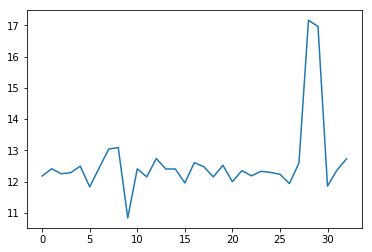

In [130]:
pdb_ensemble_domain_twist()

In [132]:
def domain_twist(traj_note,location = '/media/scottzhuang/data/MD/',skip=10):
    #wholetraj = md.load("/home/scottzhuang/masterthesis/miscellanies/pdb_ensemble/new_ensemble.pdb")
    #wholetraj.superpose(wholetraj,28)
    top_location = traj_note + ".ca.gro"
    traj_location = traj_note + ".skip" + str(skip) + ".ca.xtc"
    wholetraj = md.load(location + traj_location,top= location + top_location)
    wholetraj.superpose(wholetraj,0)
    topology = wholetraj.topology
    domain_twist = []
    for chain in range (0,5):
        residue_selection_1 = "resid " + str(8+chain*311) + " to " + str(192+chain*311)
        residue_selection_2 = "resid " + str(192+chain*311) + " to " + str(310+chain*311)
        wholetraj_sliced_ecd = wholetraj.atom_slice(topology.select(residue_selection_1))
        wholetraj_sliced_tmd = wholetraj.atom_slice(topology.select(residue_selection_2))
        angle = []
        for i in range(0,wholetraj.n_frames):
            cen_mass_ecd = md.compute_center_of_mass(wholetraj_sliced_ecd[i])[0]
            cen_mass_tmd = md.compute_center_of_mass(wholetraj_sliced_tmd[i])[0]
            cen_mass = md.compute_center_of_mass(wholetraj[i])[0]
            cen_mass_ecd[2] = cen_mass[2]
            cen_mass_tmd[2] = cen_mass[2]
            vec_ecd = cen_mass_ecd - cen_mass
            vec_tmd = cen_mass_tmd - cen_mass
            veclength_ecd = np.sqrt(np.sum(np.power(vec_ecd,2)))
            veclength_tmd = np.sqrt(np.sum(np.power(vec_tmd,2)))
            angle.append(57.2958 * np.arccos(np.dot(vec_ecd,vec_tmd) /(veclength_ecd * veclength_tmd)))
        domain_twist.append(angle)
    plt.plot(np.mean(np.asarray(domain_twist),axis=0))

[[[  4.87000036   7.21900034  12.71900082]
  [  4.69200039   7.54600048  12.63400078]
  [  4.79700041   7.86100054  12.44600105]
  ..., 
  [  2.16600013   5.91000032   7.08700037]
  [  2.45900011   6.02000046   7.30800056]
  [  2.3210001    6.36400032   7.41700029]]]


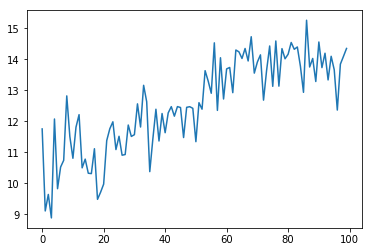

In [126]:
domain_twist("5NJY_pH70_md1/5NJY_pH70_md1")

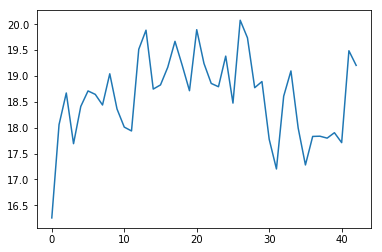

In [122]:
domain_twist("4NPQ_pH70_md5/4NPQ_pH70_md5")

[[[  5.34200048   7.42100048  12.54600048]
  [  5.22400045   7.77000046  12.44800091]
  [  5.33500004   8.04500008  12.20700073]
  ..., 
  [  2.37100005   6.69000053   6.83200026]
  [  2.66000009   6.74700022   7.07900047]
  [  2.58000016   7.10200024   7.18200016]]]


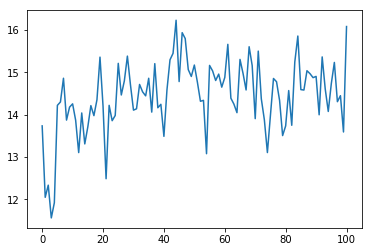

In [131]:
domain_twist("md","/media/scottzhuang/data/MD/4HFI_F238LI233T_pH46/repli1/",skip=10)

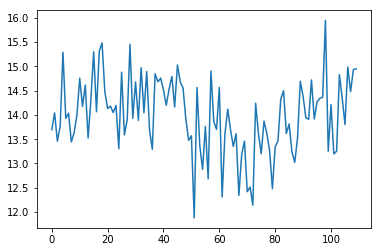

In [133]:
domain_twist("md","/media/scottzhuang/data/MD/4HFI_pH46/repli1/",skip=10)